In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()
features_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
target = pd.Series(data=diabetes.target, name='target')
df = pd.concat([features_df, target], axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


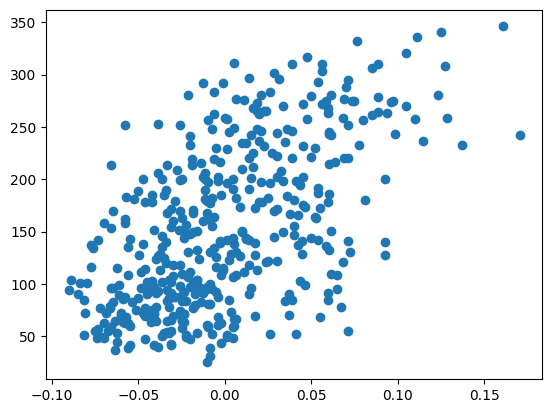

In [3]:
plt.scatter(df['bmi'], df['target'])
plt.show()

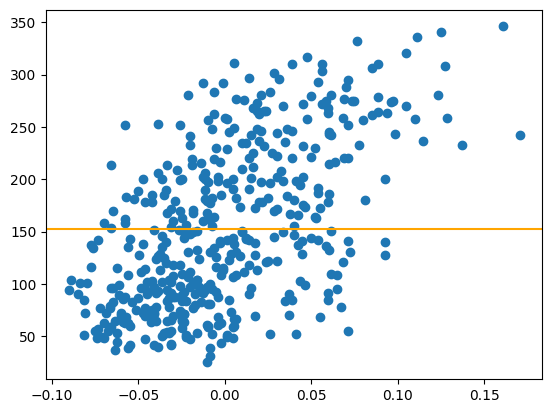

In [4]:
target_mean = np.mean(df['target'])

plt.scatter(df['bmi'], df['target'])
plt.axhline(target_mean, color='orange')

plt.show()

In [5]:
var = np.sum((df['target'] - target_mean) ** 2)
var

2621009.124434389

#### Numpy **polyfit(...)**

In [6]:
coeffs = np.polyfit(df['bmi'], df['target'], 1)
slope = coeffs[0]
intercept = coeffs[1]
coeffs

array([949.43526038, 152.13348416])

In [7]:
x_polyfit = np.linspace(-0.1, 0.15, 2)
y_polyfit = slope * x_polyfit + intercept

In [8]:
var_polyfit = np.sum((y_polyfit - target_mean) ** 2)
var_polyfit

29296.387693965546

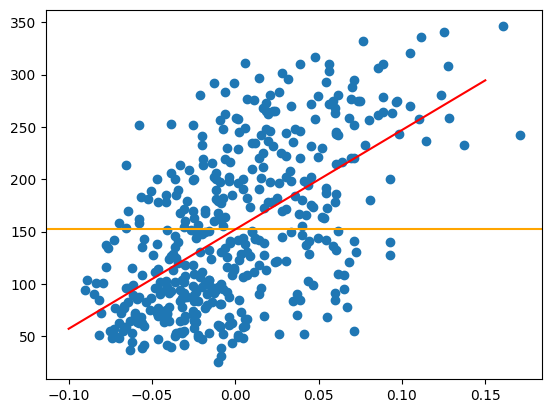

In [9]:
plt.scatter(df['bmi'], df['target'])
plt.axhline(target_mean, color='orange')
plt.plot(x_polyfit, y_polyfit, color='red')

plt.show()

#### Derivative from **Σ(y - (mx + b))^2 = 0**

In [10]:
x = df['bmi']
y = df['target']

x_mean = np.mean(x)
y_mean = np.mean(y)

x_diff = x - x_mean
y_diff = y - y_mean

m = np.sum(x_diff * y_diff) / np.sum(x_diff ** 2)
b = y_mean - (m * x_mean)

[m, b]

[949.4352603840387, 152.13348416289617]

In [11]:
x_fit = np.linspace(-0.1, 0.15, 2)
y_fit = m * x_fit + b

var_deriv = np.sum((y_fit - target_mean) ** 2)
var_deriv

29296.387693966513

In [12]:
var_deriv - var_polyfit

9.677023626863956e-10

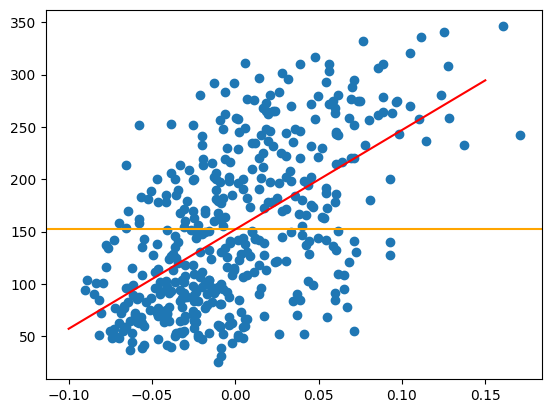

In [13]:
plt.scatter(x, y)
plt.axhline(y_mean, color='orange')
plt.plot(x_fit, y_fit, color='red')

plt.show()

#### **TODO:** Gradient Descend